In [1]:
import pandas as pd
import numpy as np
from blackjack import SimplifiedBlackjackMDP
from snake import SnakeMDP, hashable_state, array_state
import pickle
import random
import matplotlib.pyplot as plt
import time

import seaborn as sns

from copy import deepcopy

from tqdm.notebook import tqdm

C:\Users\rache\miniconda3\envs\cs-7641-env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Construct MDP Examples

In [2]:
problems = {
    'Snake': SnakeMDP(board_length=4, max_snake_length=5),
    'Blackjack': SimplifiedBlackjackMDP()
}

Trying max snake length 1 with 16 base combos
100 states found...
200 states found...
300 states found...
400 states found...
500 states found...
600 states found...
700 states found...
800 states found...
900 states found...
Trying max snake length 2 with 120 base combos
1,000 states found...
1,100 states found...
1,200 states found...
1,300 states found...
1,400 states found...
1,500 states found...
1,600 states found...
Trying max snake length 3 with 560 base combos
1,700 states found...
1,800 states found...
1,900 states found...
2,000 states found...
2,100 states found...
2,200 states found...
2,300 states found...
2,400 states found...
2,500 states found...
2,600 states found...
2,700 states found...
2,800 states found...
2,900 states found...
Trying max snake length 4 with 1,820 base combos
3,000 states found...
3,100 states found...
3,200 states found...
3,300 states found...
3,400 states found...
3,500 states found...
3,600 states found...
3,700 states found...
3,800 states fo

In [3]:
for key in problems:
    print(f'{key} MDP has {len(problems[key].states)} states.')

Snake MDP has 5776 states.
Blackjack MDP has 1271 states.


In [4]:
params = {
    'PI': [
        {'gamma': 0.99, 'epsilon': 0.001},
        {'gamma': 0.99, 'epsilon': 0.25},
        #{'gamma': 0.75, 'epsilon': 0.001},
        #{'gamma': 0.75, 'epsilon': 0.25},
        #{'gamma': 0.50, 'epsilon': 0.001},
        #{'gamma': 0.50, 'epsilon': 0.25},
        {'gamma': 0.25, 'epsilon': 0.001},
        {'gamma': 0.25, 'epsilon': 0.25},
    ],
    'VI': [
        {'gamma': 0.99, 'epsilon': 0.001},
        {'gamma': 0.99, 'epsilon': 0.25},
        #{'gamma': 0.75, 'epsilon': 0.001},
        #{'gamma': 0.75, 'epsilon': 0.25},
        #{'gamma': 0.50, 'epsilon': 0.001},
        #{'gamma': 0.50, 'epsilon': 0.25},
        {'gamma': 0.25, 'epsilon': 0.001},
        {'gamma': 0.25, 'epsilon': 0.25},
    ],
    'Q-learning': [
        {'decay_pattern': 'mitchell',        'initialization': 'zeros',        'exploration': 'introduce-randomness' , 'epsilon': 0.01 },
        {'decay_pattern': 'mitchell',        'initialization': 'first_reward', 'exploration': 'introduce-randomness' , 'epsilon': 0.05 },
        {'decay_pattern': 'mitchell',        'initialization': 'zeros',        'exploration': 'q-optimal'            , 'epsilon': 0.01 },
        {'decay_pattern': 'mitchell',        'initialization': 'first_reward', 'exploration': 'q-optimal'            , 'epsilon': 0.10 },
        #{'decay_pattern': 'iteration_based', 'initialization': 'zeros',        'exploration': 'introduce-randomness', 'epsilon': 0.01 },
        {'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'introduce-randomness' , 'epsilon': 0.10 },
        #{'decay_pattern': 'iteration_based', 'initialization': 'zeros',        'exploration': 'q-optimal'           , 'epsilon': 0.01 },
        {'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'q-optimal'            , 'epsilon': 0.05 },
    ]
}

In [5]:
def params_to_text(d):
    text = ''
    for i, k in enumerate(d):
        text += f'{k}={d[k]}'
        if i < len(d) - 1:
            text += '; '
    return text

In [6]:
start = time.time()
results = {}
for problem_name in tqdm(problems):
    results[problem_name] = {}
    for algo in tqdm(params):
        results[problem_name][algo] = {}
        for parameterization in tqdm(params[algo]):
            print(f'{problem_name}-{algo}-{parameterization} @ {(time.time() - start) / 60:.1f}m')
            
            if algo == 'PI':
                output = problems[problem_name].policy_iteration(**parameterization)
            elif algo == 'VI':
                output = problems[problem_name].value_iteration(**parameterization)
            elif algo == 'Q-learning':
                output = problems[problem_name].Q_learning(**parameterization)
            else:
                raise Exception('Unexpected...')
                
            results[problem_name][algo][params_to_text(parameterization)] = output

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Snake-PI-{'gamma': 0.99, 'epsilon': 0.001} @ 0.0m
Snake-PI-{'gamma': 0.99, 'epsilon': 0.25} @ 14.2m
Snake-PI-{'gamma': 0.25, 'epsilon': 0.001} @ 19.0m
Snake-PI-{'gamma': 0.25, 'epsilon': 0.25} @ 23.2m


  0%|          | 0/4 [00:00<?, ?it/s]

Snake-VI-{'gamma': 0.99, 'epsilon': 0.001} @ 26.9m
Snake-VI-{'gamma': 0.99, 'epsilon': 0.25} @ 28.5m
Snake-VI-{'gamma': 0.25, 'epsilon': 0.001} @ 29.6m
Snake-VI-{'gamma': 0.25, 'epsilon': 0.25} @ 30.2m


  0%|          | 0/6 [00:00<?, ?it/s]

Snake-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'zeros', 'exploration': 'introduce-randomness', 'epsilon': 0.01} @ 30.6m
Snake-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'first_reward', 'exploration': 'introduce-randomness', 'epsilon': 0.05} @ 50.6m
Snake-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'zeros', 'exploration': 'q-optimal', 'epsilon': 0.01} @ 70.6m
Snake-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'first_reward', 'exploration': 'q-optimal', 'epsilon': 0.1} @ 90.7m
Snake-Q-learning-{'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'introduce-randomness', 'epsilon': 0.1} @ 110.7m
Snake-Q-learning-{'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'q-optimal', 'epsilon': 0.05} @ 113.8m


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Blackjack-PI-{'gamma': 0.99, 'epsilon': 0.001} @ 122.5m
Blackjack-PI-{'gamma': 0.99, 'epsilon': 0.25} @ 122.5m
Blackjack-PI-{'gamma': 0.25, 'epsilon': 0.001} @ 122.5m
Blackjack-PI-{'gamma': 0.25, 'epsilon': 0.25} @ 122.6m


  0%|          | 0/4 [00:00<?, ?it/s]

Blackjack-VI-{'gamma': 0.99, 'epsilon': 0.001} @ 122.6m
Blackjack-VI-{'gamma': 0.99, 'epsilon': 0.25} @ 122.6m
Blackjack-VI-{'gamma': 0.25, 'epsilon': 0.001} @ 122.6m
Blackjack-VI-{'gamma': 0.25, 'epsilon': 0.25} @ 122.6m


  0%|          | 0/6 [00:00<?, ?it/s]

Blackjack-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'zeros', 'exploration': 'introduce-randomness', 'epsilon': 0.01} @ 122.6m
Blackjack-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'first_reward', 'exploration': 'introduce-randomness', 'epsilon': 0.05} @ 138.2m
Blackjack-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'zeros', 'exploration': 'q-optimal', 'epsilon': 0.01} @ 154.6m
Blackjack-Q-learning-{'decay_pattern': 'mitchell', 'initialization': 'first_reward', 'exploration': 'q-optimal', 'epsilon': 0.1} @ 173.0m
Blackjack-Q-learning-{'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'introduce-randomness', 'epsilon': 0.1} @ 191.3m
Blackjack-Q-learning-{'decay_pattern': 'iteration_based', 'initialization': 'first_reward', 'exploration': 'q-optimal', 'epsilon': 0.05} @ 207.3m


In [7]:
with open('results_20221126_1342.pkl', 'wb') as f:
    pickle.dump(results, f)

# Testing for accuracy

In [8]:
def plot_snake_state(s):
    board, last_direction = array_state(s)
    plt.imshow(board, interpolation='none')
    plt.title(f"Snake with last move='{s[1]}'")
    plt.xticks([0, 1, 2, 3])
    plt.yticks([0, 1, 2, 3])
    plt.show()

In [9]:
snake_example_0 = hashable_state(
    (np.array([[0., 0., 3., 0.],
               [0., 0., 0., 0.],
               [0., 0., 0., 0.],
               [0., 0., 2., 0.]]),
     'right')
)

snake_example_1 = hashable_state(
    (np.array([[0., 0., 2., 0.],
               [0., 0., 1., 0.],
               [0., 0., 0., 0.],
               [0., 3., 0., 0.]]),
     'up')
)

snake_example_2 = hashable_state(
    (np.array([[0., 2., 1., 0.],
               [0., 0., 0., 0.],
               [0., 0., 0., 0.],
               [0., 3., 0., 0.]]),
     'left')
)

snake_example_3 = hashable_state(
    (np.array([[0., 0., 0., 3.],
               [0., 1., 0., 0.],
               [0., 1., 0., 0.],
               [0., 2., 0., 0.]]),
     'down')
)

snake_example_4 = hashable_state(
    (np.array([[0., 0., 0., 0.],
               [0., 0., 0., 0.],
               [0., 0., 1., 1.],
               [0., 0., 2., 3.]]),
     'down')
)

correct_snake_answers = [
    (snake_example_0, 'up'),
    (snake_example_1, 'left'),
    (snake_example_2, 'down'),
    (snake_example_3, 'right'),
    (snake_example_4, 'left')
]

In [10]:
blackjack_example_0 = (2, 7, 'hitting')
blackjack_example_1 = (10, 7, 'hitting')
blackjack_example_2 = (18, 6, 'hitting')
blackjack_example_3 = (16, 6, 'hitting')
blackjack_example_4 = (11, 11, 'hitting')

correct_blackjack_answers = [
    (blackjack_example_0, 'hit'),
    (blackjack_example_1, 'hit'),
    (blackjack_example_2, 'hold'),
    (blackjack_example_3, 'hold'),
    (blackjack_example_4, 'hit')
]

In [11]:
accuracy = pd.DataFrame()

for problem_name in results:
    for algo in results[problem_name]:
        for parameterization in results[problem_name][algo]:
            policy, value_or_q, stats = results[problem_name][algo][parameterization]
            key = f'{problem_name}-{algo}-{parameterization}'
            if problem_name == 'Snake':
                test = correct_snake_answers
            else:
                test = correct_blackjack_answers
            for i, (question, answer) in enumerate(test):
                col = f'Problem{i}'
                correct = policy[question] == answer
                accuracy.loc[key, col] = '✓' if correct else '❌'
                

In [35]:
accuracy[accuracy.index.str.contains('Q-learn')]

,Problem0,Problem1,Problem2,Problem3,Problem4
Snake-Q-learning-decay_pattern=mitchell; initialization=zeros; exploration=introduce-randomness; epsilon=0.01,✓,✓,✓,✓,✓
Snake-Q-learning-decay_pattern=mitchell; initialization=first_reward; exploration=introduce-randomness; epsilon=0.05,✓,✓,✓,✓,✓
Snake-Q-learning-decay_pattern=mitchell; initialization=zeros; exploration=q-optimal; epsilon=0.01,✓,❌,✓,✓,✓
Snake-Q-learning-decay_pattern=mitchell; initialization=first_reward; exploration=q-optimal; epsilon=0.1,❌,❌,✓,✓,✓
Snake-Q-learning-decay_pattern=iteration_based; initialization=first_reward; exploration=introduce-randomness; epsilon=0.1,✓,✓,✓,✓,✓
Snake-Q-learning-decay_pattern=iteration_based; initialization=first_reward; exploration=q-optimal; epsilon=0.05,✓,✓,✓,✓,✓
Blackjack-Q-learning-decay_pattern=mitchell; initialization=zeros; exploration=introduce-randomness; epsilon=0.01,✓,✓,✓,✓,❌
Blackjack-Q-learning-decay_pattern=mitchell; initialization=first_reward; exploration=introduce-randomness; epsilon=0.05,✓,✓,✓,✓,❌
Blackjack-Q-learning-decay_pattern=mitchell; initialization=zeros; exploration=q-optimal; epsilon=0.01,✓,✓,✓,✓,❌
Blackjack-Q-learning-decay_pattern=mitchell; initialization=first_reward; exploration=q-optimal; epsilon=0.1,✓,✓,✓,✓,❌


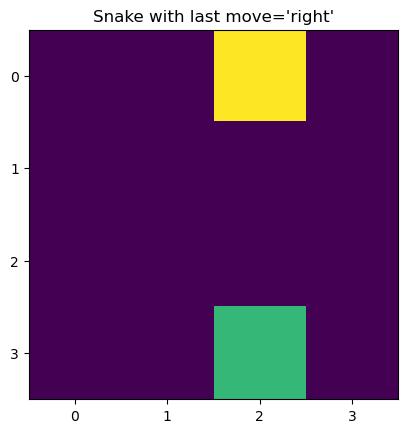

up


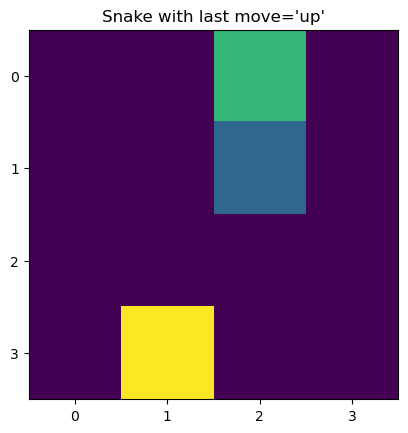

left


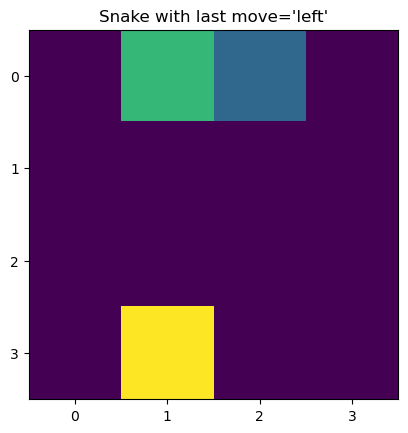

down


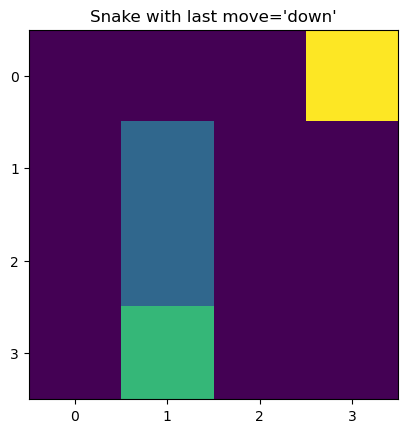

right


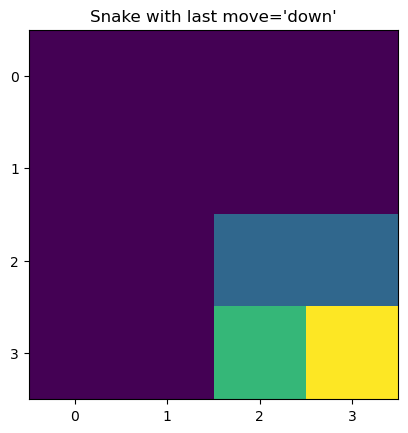

left


In [13]:
for question, answers in correct_snake_answers:
    plot_snake_state(question)
    print(answers)

In [14]:
snake_example_3

((0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0),
 'down')

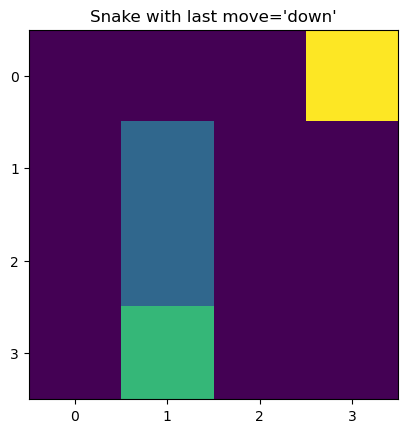

In [15]:
plot_snake_state(snake_example_3)

# Analyze convergence

In [16]:
stats_collection = {}
stats_df = pd.DataFrame(columns=['Iteration', 'Time (s)', 'Max Changes'])
stats

for problem_name in results:
    for algo in results[problem_name]:
        for parameterization in results[problem_name][algo]:
            policy, value_or_q, stats = results[problem_name][algo][parameterization]
            key = f'{problem_name}-{algo}-{parameterization}'
            stats_collection[key] = stats
            #stats_df.loc[key] = stats.reset_index()

In [17]:
len(stats_collection)

28

### Time required for each

In [18]:
total_time = pd.Series(index=stats_collection.keys(), dtype='float')
for key in stats_collection:
    total_time.loc[key] = stats_collection[key]['Time (s)'].sum()
total_time = total_time.sort_values()

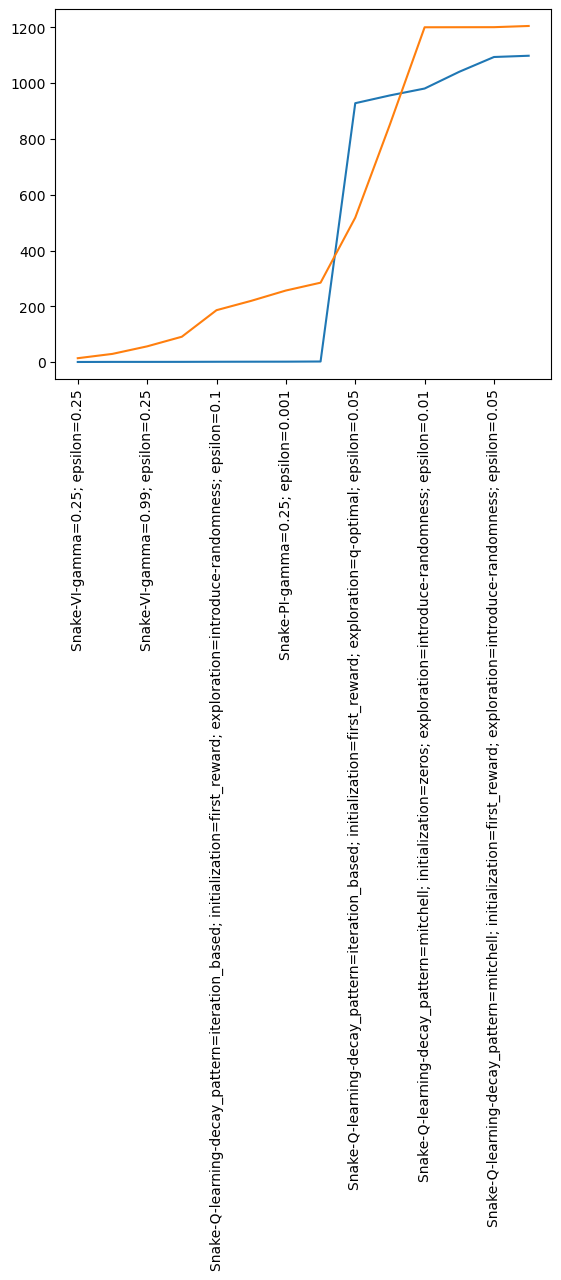

In [19]:
for game in ['Blackjack', 'Snake']:
    subset = total_time[total_time.index.str.startswith(game)]
    subset.plot(rot=90)

In [20]:
acc_and_time = (
    (accuracy == '✓')
    .all(axis=1)
    .rename('Accuracy')
    .apply(lambda x: '✓' if x else '❌')
    .to_frame()
    .join(total_time.rename('Total Time (s)').round(2))
)

acc_and_time.sort_values(['Accuracy', 'Total Time (s)'])

,Accuracy,Total Time (s)
Blackjack-VI-gamma=0.25; epsilon=0.25,✓,0.33
Blackjack-VI-gamma=0.99; epsilon=0.25,✓,0.66
Blackjack-VI-gamma=0.25; epsilon=0.001,✓,0.66
Blackjack-PI-gamma=0.25; epsilon=0.25,✓,0.77
Blackjack-VI-gamma=0.99; epsilon=0.001,✓,1.09
Blackjack-PI-gamma=0.99; epsilon=0.25,✓,1.31
Blackjack-PI-gamma=0.25; epsilon=0.001,✓,1.44
Blackjack-PI-gamma=0.99; epsilon=0.001,✓,2.03
Snake-VI-gamma=0.25; epsilon=0.25,✓,13.86
Snake-VI-gamma=0.25; epsilon=0.001,✓,29.35


In [38]:
def select_option(s, options):
    results = s.copy()
    for x in options:
        results = np.where(
            s.str.contains(x),
            x,
            results
        )
    return results

stats = (
    pd.concat(stats_collection)
    .reset_index(level=0, drop=False)
    .assign(problem=lambda x: select_option(x['level_0'], ['Snake', 'Blackjack']),
            algorithm=lambda x: select_option(x['level_0'], ['PI', 'VI', 'Q-learning']),
            params=lambda x: x['level_0'].str.split('-', n=2).apply(lambda x: x[2]))
    .set_index('level_0', append=True)
    .reorder_levels([1, 0])
)

stats

Time (s)  \
level_0                                            Iteration               
Snake-PI-gamma=0.99; epsilon=0.001                 1          507.548054   
                                                   2           25.342545   
                                                   3           34.349448   
                                                   4           38.211377   
                                                   5           39.202229   
...                                                                  ...   
Blackjack-Q-learning-decay_pattern=iteration_ba... 9996         0.093726   
                                                   9997         0.109348   
                                                   9998         0.109350   
                                                   9999         0.109350   
                                                   10000        0.109350   

                                                              Max Changes  \
level_0                                            Iteration                
Snake-PI-gamma=0.99; epsilon=0.001                 1          3823.000000   
                                                   2          1585.000000   
                                                   3          1519.000000   
                                                   4          1483.000000   
                                                   5          1007.000000   
...                                                                   ...   
Blackjack-Q-learning-decay_pattern=iteration_ba... 9996          1.960200   
                                                   9997          1.960200   
                                                   9998          1.950399   
                                                   9999          1.960200   
                                                   10000         1.960200   

                                                                problem  \
level_0                                            Iteration              
Snake-PI-gamma=0.99; epsilon=0.001                 1              Snake   
                                                   2              Snake   
                                                   3              Snake   
                                                   4              Snake   
                                                   5              Snake   
...                                                                 ...   
Blackjack-Q-learning-decay_pattern=iteration_ba... 9996       Blackjack   
                                                   9997       Blackjack   
                                                   9998       Blackjack   
                                                   9999       Blackjack   
                                                   10000      Blackjack   

                                                               algorithm  \
level_0                                            Iteration               
Snake-PI-gamma=0.99; epsilon=0.001                 1                  PI   
                                                   2                  PI   
                                                   3                  PI   
                                                   4                  PI   
                                                   5                  PI   
...                                                                  ...   
Blackjack-Q-learning-decay_pattern=iteration_ba... 9996       Q-learning   
                                                   9997       Q-learning   
                                                   9998       Q-learning   
                                                   9999       Q-learning   
                                                   10000      Q-learning   

                                                                                                         par

## Best parameterizations for each subset

In [37]:
out = stats.groupby(['problem', 'algorithm', 'params']).agg({'Time (s)': ['sum', 'size']}).reset_index().groupby(['problem', 'algorithm']).mean().round(2).reset_index()
out.columns = ['Problem', 'Algorithm', 'Mean Time (s)', 'Mean required iterations']
out

C:\Users\rache\AppData\Local\Temp\ipykernel_17048\3528686091.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  out = stats.groupby(['problem', 'algorithm', 'params']).agg({'Time (s)': ['sum', 'size']}).reset_index().groupby(['problem', 'algorithm']).mean().round(2).reset_index()


,Problem,Algorithm,Mean Time (s),Mean required iterations
0,Blackjack,PI,1.39,3.00
1,Blackjack,Q-learning,1016.33,10000.00
2,Blackjack,VI,0.68,6.25
3,Snake,PI,403.21,16.00
4,Snake,Q-learning,918.43,306.33
5,Snake,VI,47.60,9.25


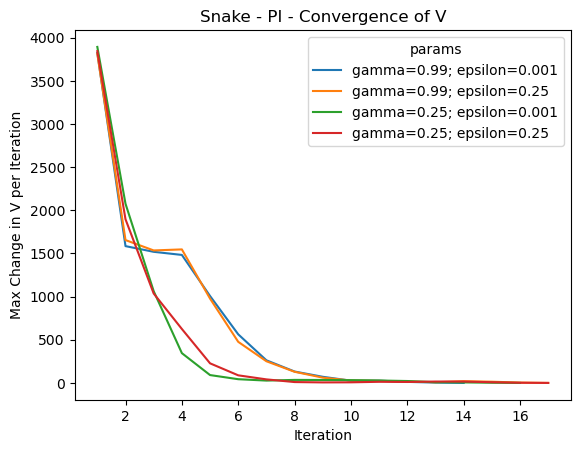

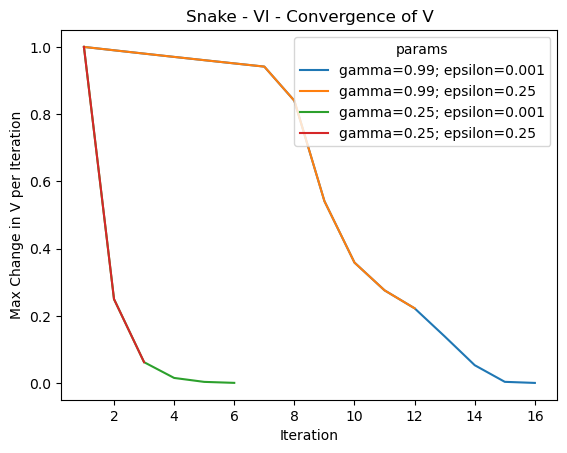

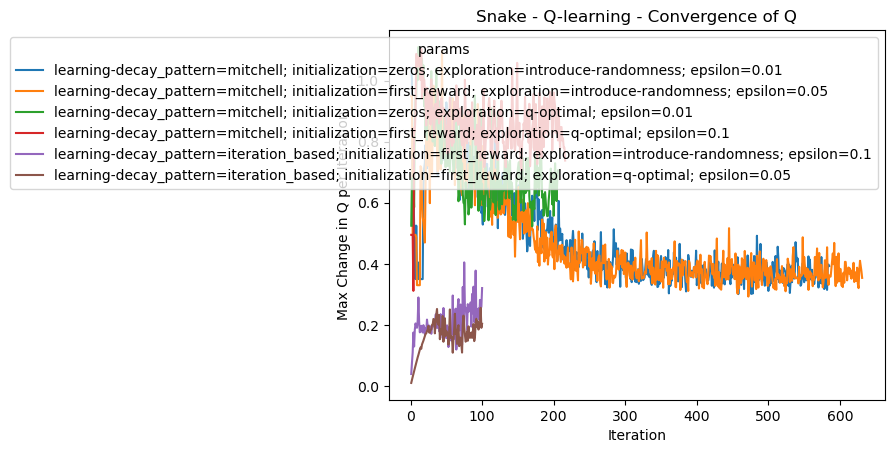

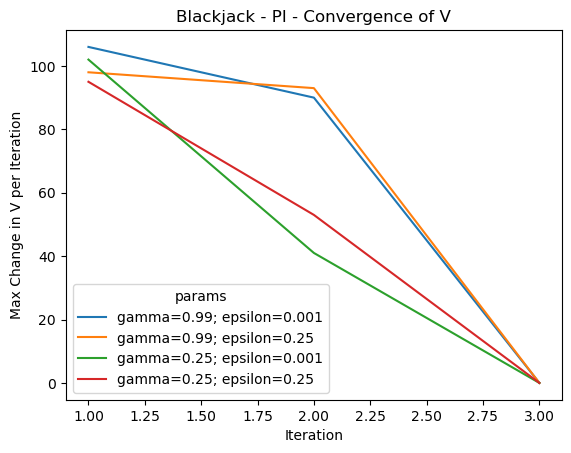

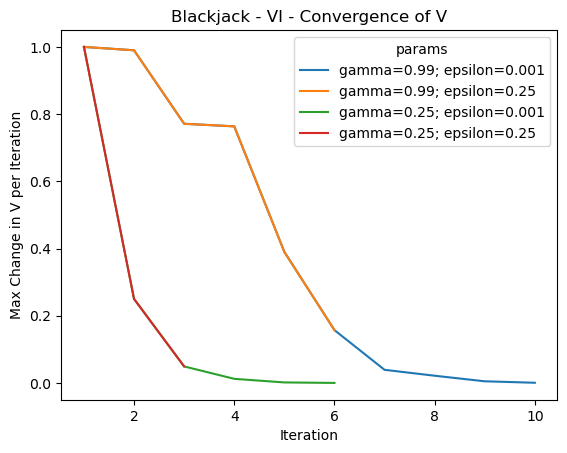

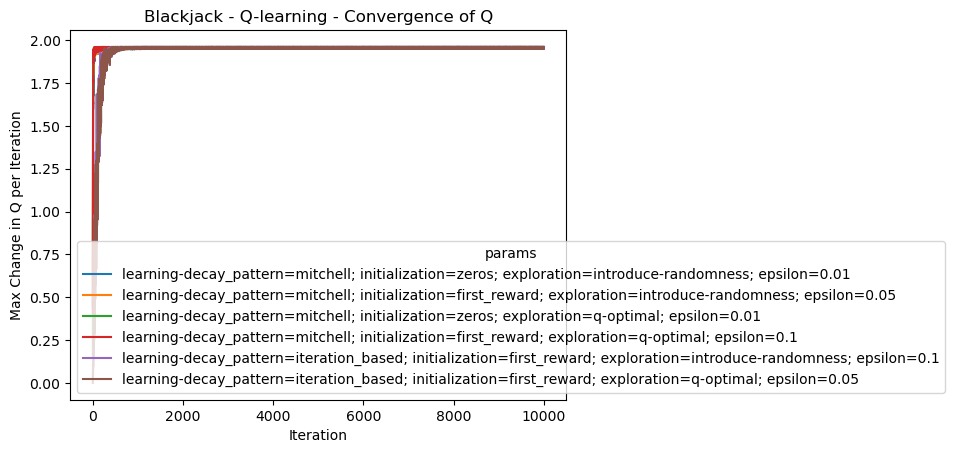

In [23]:
for game in ['Snake', 'Blackjack']:
    for algorithm in ['PI', 'VI', 'Q-learning']:
        stats_subset = stats[(stats['problem'] == game) & (stats['algorithm'] == algorithm)]
        df = stats_subset.reset_index()
        plt.clf()
        y_var = 'Q' if algorithm == 'Q-learning' else 'V'
        sns.lineplot(x='Iteration', y='Max Changes', data=df, hue='params')
        plt.title(f'{game} - {algorithm} - Convergence of {y_var}')
        plt.ylabel(f'Max Change in {y_var} per Iteration')
        plt.show()
        

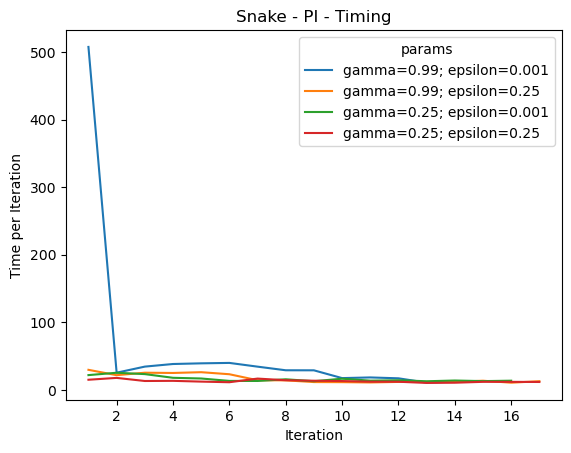

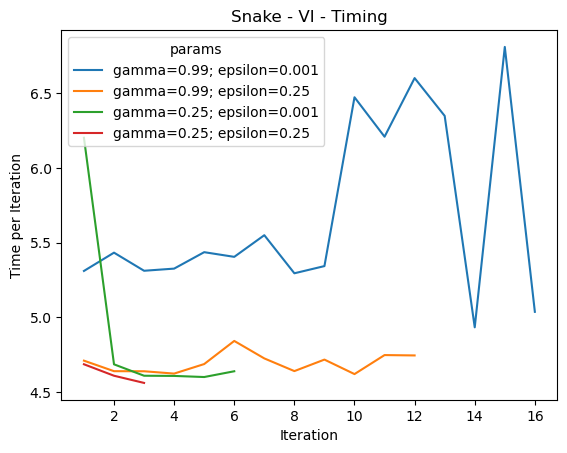

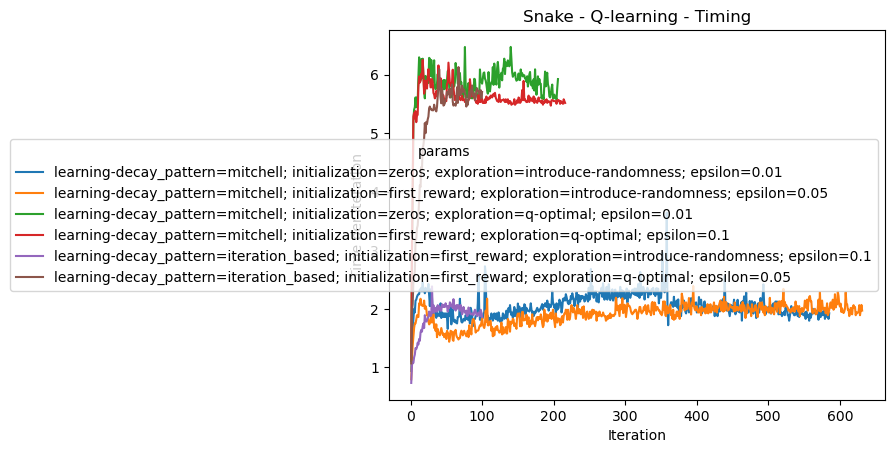

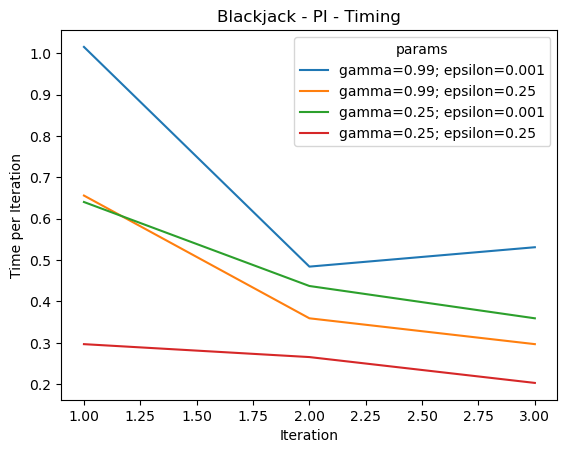

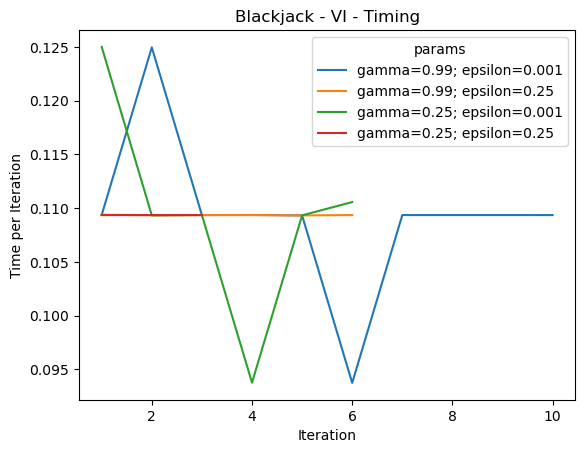

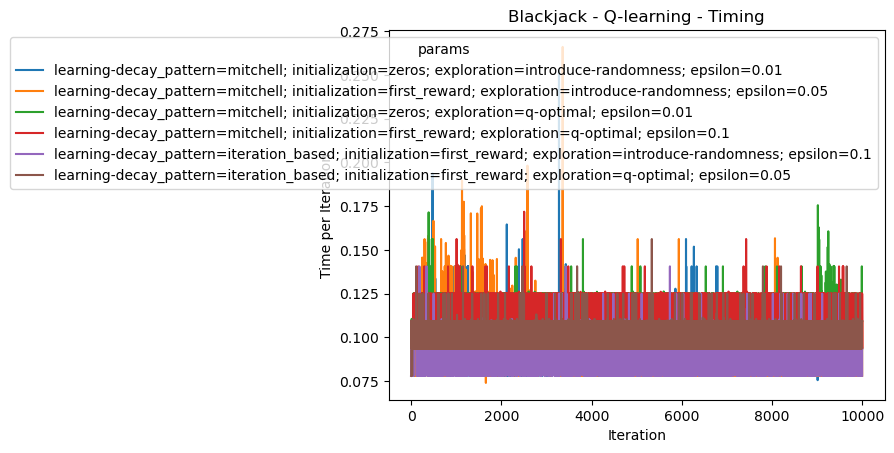

In [24]:
for game in ['Snake', 'Blackjack']:
    for algorithm in ['PI', 'VI', 'Q-learning']:
        stats_subset = stats[(stats['problem'] == game) & (stats['algorithm'] == algorithm)]
        df = stats_subset.reset_index()
        plt.clf()
        y_var = 'Q' if algorithm == 'Q-learning' else 'V'
        sns.lineplot(x='Iteration', y='Time (s)', data=df, hue='params')
        plt.title(f'{game} - {algorithm} - Timing')
        plt.ylabel(f'Time per Iteration')
        plt.show()
        

## Visualize policy

In [25]:
# select favorite example of each algorithm
blackjack_policy, blackjack_value = results['Blackjack']['VI']['gamma=0.99; epsilon=0.001'][:2]
snake_policy, snake_value = results['Snake']['VI']['gamma=0.99; epsilon=0.001'][:2]

### Blackjack

In [26]:
policy_visualization = pd.DataFrame(
    index=pd.Index(range(2, 12), name='Dealer Value'),
    columns=pd.Index(range(2, 22), name='Player Value'),
    dtype='string'
)
for i in range(2, 12):
    for j in range(2, 22):
        policy_visualization.loc[i, j] = blackjack_policy[(j, i, 'hitting')]

policy_visualization.iloc[:, 5:15]

Player Value,7,8,9,10,11,12,13,14,15,16
Dealer Value,,,,,,,,,,
2,hit,hit,hit,hit,hit,hold,hold,hold,hold,hold
3,hit,hit,hit,hit,hit,hold,hold,hold,hold,hold
4,hit,hit,hit,hit,hit,hold,hold,hold,hold,hold
5,hit,hit,hit,hit,hit,hold,hold,hold,hold,hold
6,hit,hit,hit,hit,hit,hold,hold,hold,hold,hold
7,hit,hit,hit,hit,hit,hit,hit,hit,hold,hold
8,hit,hit,hit,hit,hit,hit,hit,hold,hold,hold
9,hit,hit,hit,hit,hit,hit,hit,hold,hold,hold
10,hit,hit,hit,hit,hit,hit,hold,hold,hold,hold


In [27]:
value_visualization = pd.DataFrame(
    index=pd.Index(range(2, 12), name='Dealer Value'),
    columns=pd.Index(range(2, 22), name='Player Value'),
    dtype='float'
)
for i in range(2, 12):
    for j in range(2, 22):
        value_visualization.loc[i, j] = blackjack_value[(j, i, 'hitting')]

value_visualization = value_visualization.iloc[:, 5:15].round(2)
cm = sns.diverging_palette(h_neg=0, h_pos=150, as_cmap=True)
s = value_visualization.style.background_gradient(cmap=cm)
s.format(precision=2)
s

Player Value,7,8,9,10,11,12,13,14,15,16
Dealer Value,,,,,,,,,,
2,-0.07,-0.00,0.08,0.19,0.22,-0.17,-0.17,-0.17,-0.17,-0.17
3,-0.04,0.03,0.11,0.21,0.24,-0.13,-0.13,-0.13,-0.13,-0.13
4,-0.01,0.06,0.13,0.24,0.26,-0.10,-0.10,-0.10,-0.10,-0.10
5,0.03,0.09,0.16,0.26,0.28,-0.05,-0.05,-0.05,-0.05,-0.05
6,0.03,0.10,0.18,0.27,0.29,-0.06,-0.06,-0.06,-0.06,-0.06
7,-0.22,-0.02,0.08,0.17,0.18,-0.32,-0.36,-0.41,-0.42,-0.42
8,-0.30,-0.21,-0.01,0.11,0.12,-0.37,-0.41,-0.45,-0.45,-0.45
9,-0.36,-0.30,-0.20,0.02,0.06,-0.43,-0.47,-0.49,-0.49,-0.49
10,-0.42,-0.36,-0.29,-0.17,-0.01,-0.49,-0.53,-0.53,-0.53,-0.53


### Snake

In [28]:
def plot_snake_state_with_subtitle(s, subtitle):
    board, last_direction = array_state(s)
    plt.imshow(board, interpolation='none')
    plt.suptitle(f"Snake with last move='{s[1]}'", fontsize=12, y=0.96)
    plt.title(subtitle, fontsize=10)
    plt.show()

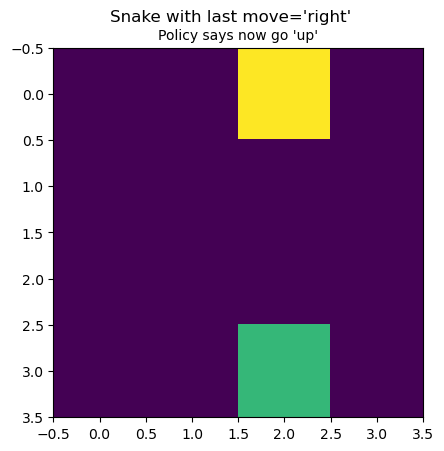

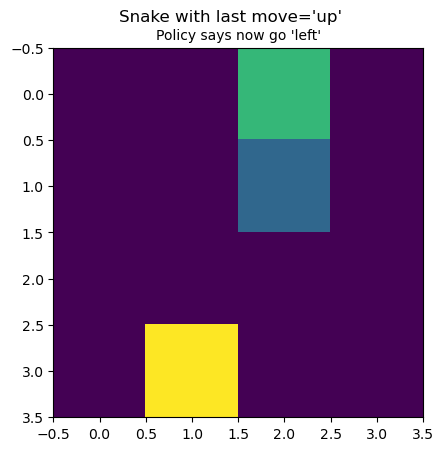

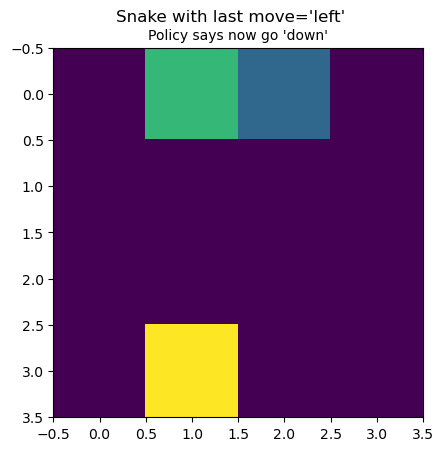

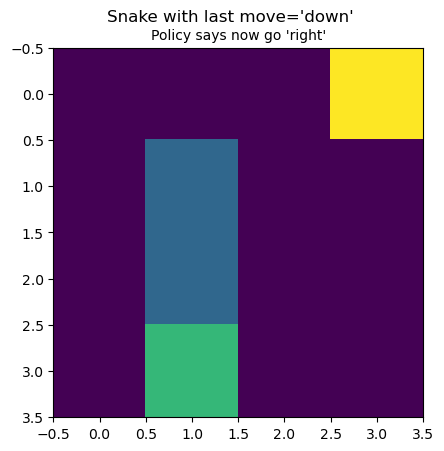

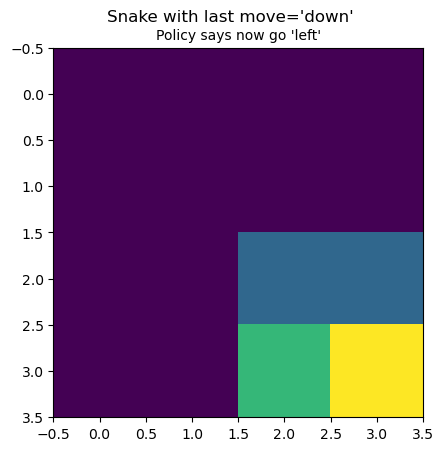

In [29]:
for ex in [snake_example_0, snake_example_1, snake_example_2, snake_example_3, snake_example_4]:
    plot_snake_state_with_subtitle(ex, f'Policy says now go \'{snake_policy[ex]}\'')

### Policy differences

#### Between VI and PI

In [30]:
blackjack_policy_vi = results['Blackjack']['VI']['gamma=0.99; epsilon=0.001'][0]
blackjack_policy_pi = results['Blackjack']['PI']['gamma=0.99; epsilon=0.001'][0]
snake_policy_vi = results['Snake']['VI']['gamma=0.99; epsilon=0.001'][0]
snake_policy_pi = results['Snake']['PI']['gamma=0.99; epsilon=0.001'][0]


In [31]:
def dict_compare(d1, d2):
    s1 = pd.Series(d1)
    s2 = pd.Series(d2)
    assert (s1.index == s2.index).all()
    comparison = s1 != s2
    return s1.rename('VI').to_frame().join(s2.rename('PI'))[comparison]

In [32]:
dict_compare(blackjack_policy_vi, blackjack_policy_pi)

,,,VI,PI


In [33]:
dict_compare(snake_policy_vi, snake_policy_pi)

VI  PI
(0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0... up     right  up
                                                   right  right  up
(0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0... up     right  up
                                                   right  right  up
(0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0... up     right  up
                                                   right  right  up

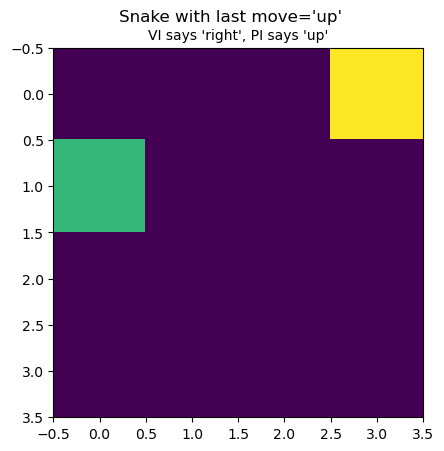

In [34]:
plot_snake_state_with_subtitle(
    ((0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 'up'),
    subtitle="VI says 'right', PI says 'up'"
)

# Q-learning tuning 

In [50]:
q = stats[stats['algorithm'] == 'Q-learning']

q = (
    q
    .reset_index(level=0, drop=False)
    .assign(decay=lambda x: select_option(x['level_0'], ['mitchell', 'iteration_based']),
            initialization=lambda x: select_option(x['level_0'], ['zeros', 'first_reward']),
            exploration=lambda x: select_option(x['level_0'], ['introduce-randomness', 'q-optimal']),
            iterations=1)
    .set_index('level_0', append=True)
    .reorder_levels([1, 0])
)

q.groupby(['problem', 'decay', 'initialization', 'exploration']).agg({'Time (s)': sum, 'iterations': 'sum'}).round(1).reset_index()


,problem,decay,initialization,exploration,Time (s),iterations
0,Blackjack,iteration_based,first_reward,introduce-randomness,956.1,10000
1,Blackjack,iteration_based,first_reward,q-optimal,1040.9,10000
2,Blackjack,mitchell,first_reward,introduce-randomness,980.8,10000
3,Blackjack,mitchell,first_reward,q-optimal,1093.8,10000
4,Blackjack,mitchell,zeros,introduce-randomness,928.2,10000
5,Blackjack,mitchell,zeros,q-optimal,1098.3,10000
6,Snake,iteration_based,first_reward,introduce-randomness,186.0,100
7,Snake,iteration_based,first_reward,q-optimal,517.9,100
8,Snake,mitchell,first_reward,introduce-randomness,1200.7,631
9,Snake,mitchell,first_reward,q-optimal,1205.0,216
